In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from scipy import stats

In [2]:
car1 = pd.read_csv('cars_price.csv')
car2 = pd.read_csv('cars_multi.csv')

In [3]:
data = pd.concat([car1['price'], car2], axis = 1)

In [4]:
data.head()

,price,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,25561.59078,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,24221.42273,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,27240.84373,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,33684.96888,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,20000.00000,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [6]:
resumetable(data)

Dataset Shape: (398, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,price,float64,0,224,25561.6,24221.4,27240.8,5.99
1,ID,int64,0,398,1,2,3,8.64
2,mpg,float64,0,129,18,15,18,6.22
3,cylinders,int64,0,5,8,8,8,1.59
4,displacement,float64,0,82,307,350,318,5.74
5,horsepower,object,0,94,130,165,150,5.88
6,weight,int64,0,351,3504,3693,3436,8.38
7,acceleration,float64,0,95,12,11.5,11,5.94
8,model,int64,0,13,70,70,70,3.69
9,origin,int64,0,3,1,1,1,1.33


In [7]:
data['horsepower'] [data['horsepower'] == '?'] = np.nan

C:\Users\cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
data['horsepower'] = pd.to_numeric(data['horsepower'])

In [70]:
data['horsepower'] = data['horsepower'].astype(str)

In [9]:
data.describe()

,price,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,29684.473444,199.500000,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,9832.263303,115.036951,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,1598.073370,1.000000,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,23109.802772,100.250000,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,30000.000000,199.500000,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,36429.918888,298.750000,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,53745.938060,398.000000,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
def CalcOutliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

In [58]:
CalcOutliers(data['cylinders'])

Identified lowest outliers: 0
Identified upper outliers: 0
Total outlier observations: 0
Non-outlier observations: 398
Total percentual of Outliers:  0.0


In [45]:
missing_values_count = data.isnull().sum()
print (missing_values_count)
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
print ("% of missing data = ",(total_missing/total_cells) * 100)

price           0
ID              0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car_name        0
dtype: int64
% of missing data =  0.0


In [44]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())

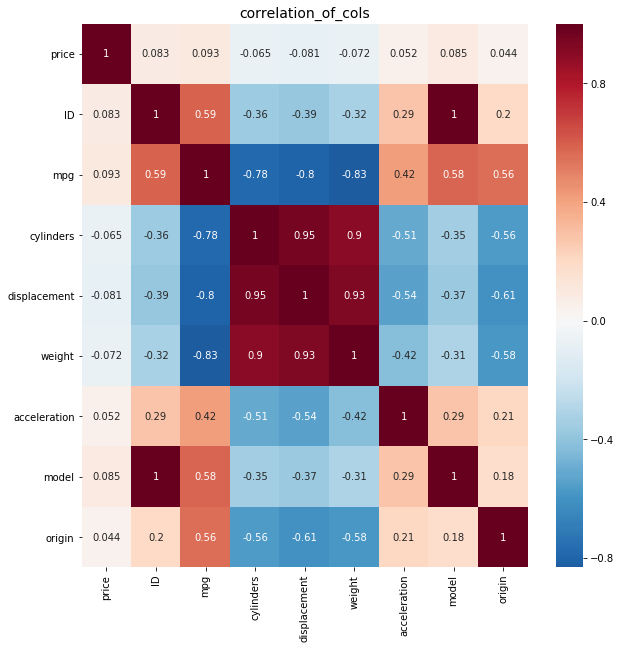

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('correlation_of_cols',fontsize=14)
plt.show()


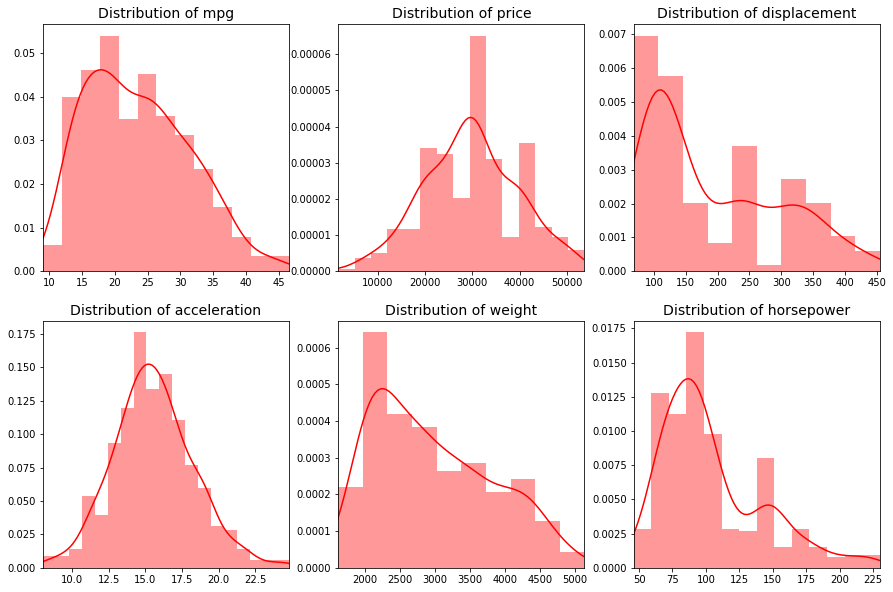

In [48]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

time_val = data['mpg'].values

sns.distplot(time_val, ax=ax[0][0], color='r')
ax[0][0].set_title('Distribution of mpg', fontsize=14)
ax[0][0].set_xlim([min(time_val), max(time_val)])


time_val = data['price'].values

sns.distplot(time_val, ax=ax[0][1], color='r')
ax[0][1].set_title('Distribution of price', fontsize=14)
ax[0][1].set_xlim([min(time_val), max(time_val)])



time_val = data['displacement'].values

sns.distplot(time_val, ax=ax[0][2], color='r')
ax[0][2].set_title('Distribution of displacement', fontsize=14)
ax[0][2].set_xlim([min(time_val), max(time_val)])


time_val = data['acceleration'].values

sns.distplot(time_val, ax=ax[1][0], color='r')
ax[1][0].set_title('Distribution of acceleration', fontsize=14)
ax[1][0].set_xlim([min(time_val), max(time_val)])


time_val = data['weight'].values

sns.distplot(time_val, ax=ax[1][1], color='r')
ax[1][1].set_title('Distribution of weight', fontsize=14)
ax[1][1].set_xlim([min(time_val), max(time_val)])



time_val = data['horsepower'].values

sns.distplot(time_val, ax=ax[1][2], color='r')
ax[1][2].set_title('Distribution of horsepower', fontsize=14)
ax[1][2].set_xlim([min(time_val), max(time_val)])

plt.show()



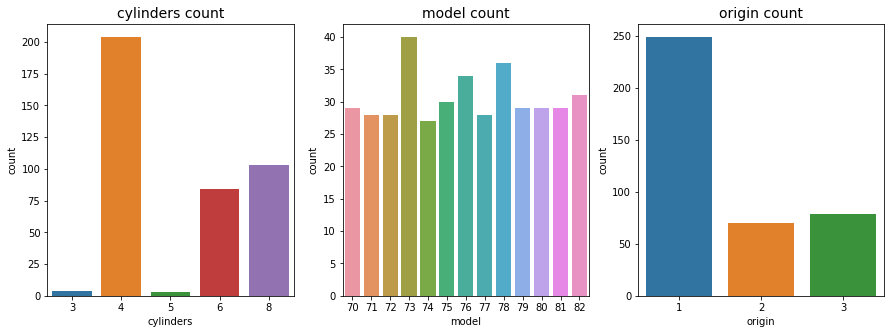

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.countplot(x="cylinders", ax=ax[0],  data=data)
ax[0].set_title('cylinders count', fontsize=14)

sns.countplot(x="model", ax=ax[1], data=data)
ax[1].set_title('model count', fontsize=14)

sns.countplot(x="origin", ax=ax[2], data=data)
ax[2].set_title('origin count', fontsize=14)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

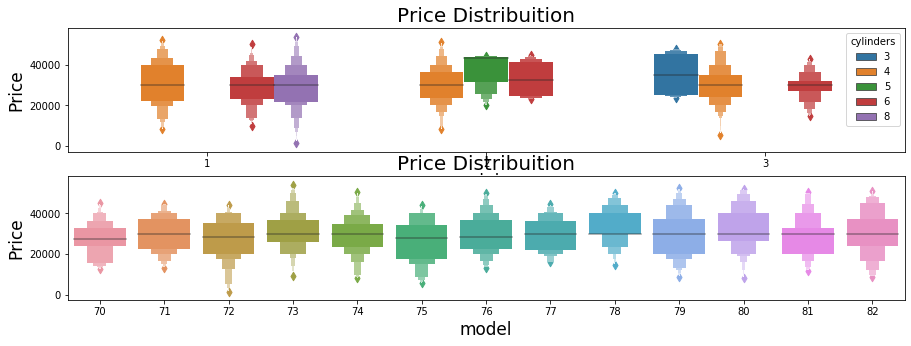

In [88]:
fig, ax = plt.subplots(2,1, figsize = (15,5))

sns.boxenplot(x='origin', y='price',hue = 'cylinders',
              data=data,ax=ax[0] )
ax[0].set_title("Price Distribuition", fontsize=20)
ax[0].set_xlabel("origin", fontsize=17)
ax[0].set_ylabel("Price", fontsize=17)


sns.boxenplot(x='model', y='price',
              data=data,ax=ax[1] )
ax[1].set_title("Price Distribuition", fontsize=20)
ax[1].set_xlabel("model", fontsize=17)
ax[1].set_ylabel("Price", fontsize=17)

plt.show

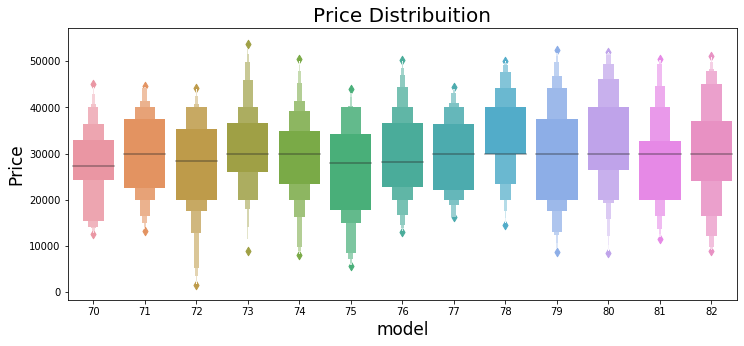

In [81]:
fig, ax = plt.subplots(1,1, figsize = (12,5))

sns.boxenplot(x='model', y='price',
              data=data )
ax.set_title("Price Distribuition", fontsize=20)
ax.set_xlabel("model", fontsize=17)
ax.set_ylabel("Price", fontsize=17)


plt.show()

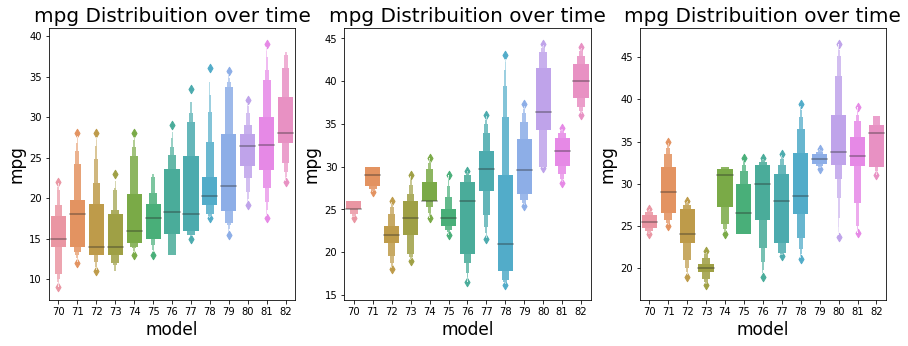

In [102]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.boxenplot(x='model', y='mpg',
              data=data[data['origin'] == 1],ax=ax[0] )
ax[0].set_title("mpg Distribuition over time", fontsize=20)
ax[0].set_xlabel("model", fontsize=17)
ax[0].set_ylabel("mpg", fontsize=17)

sns.boxenplot(x='model', y='mpg',
              data=data[data['origin'] == 2],ax=ax[1] )
ax[1].set_title("mpg Distribuition over time", fontsize=20)
ax[1].set_xlabel("model", fontsize=17)
ax[1].set_ylabel("mpg", fontsize=17)

sns.boxenplot(x='model', y='mpg',
              data=data[data['origin'] == 3],ax=ax[2] )
ax[2].set_title("mpg Distribuition over time", fontsize=20)
ax[2].set_xlabel("model", fontsize=17)
ax[2].set_ylabel("mpg", fontsize=17)

plt.show()


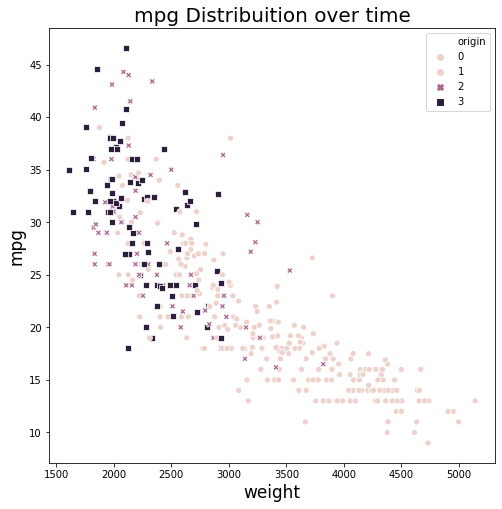

In [115]:
fig, ax = plt.subplots(1,1, figsize = (8,8))


sns.scatterplot(x="weight", y="mpg",
                   hue="origin", style= 'origin', data=data)

ax.set_title("mpg Distribuition over time", fontsize=20)
ax.set_xlabel("weight", fontsize=17)
ax.set_ylabel("mpg", fontsize=17)


plt.show()